In [5]:
import numpy as np
import matplotlib.pyplot as plt

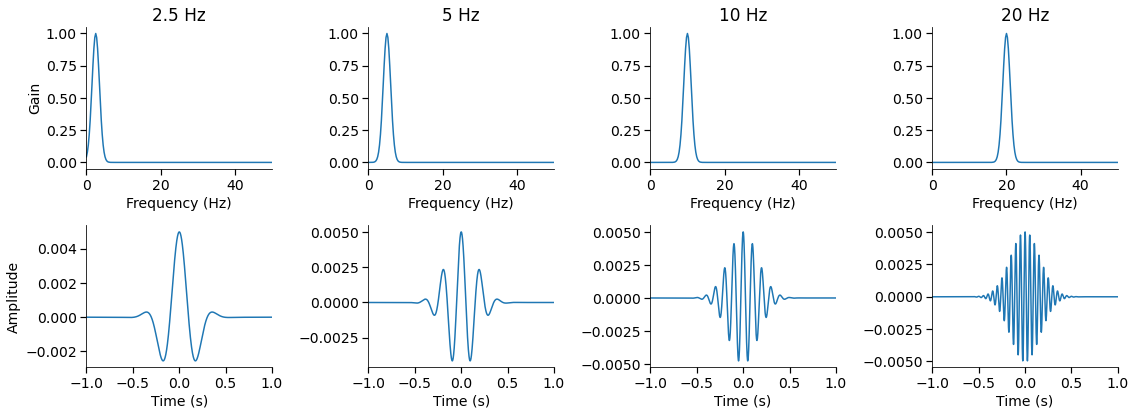

In [9]:
plt.rcParams.update({
    'font.size': 14,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

# Parameters
srate = 1000
n_pts = 4000
df = 2
sigma = df / 2
fft_frex = np.fft.rfftfreq(n_pts, d=1 / srate)
freqs_to_show = [2.5, 5, 10, 20]

# Create plots
fig, axs = plt.subplots(2, len(freqs_to_show), figsize=(16, 6))

for i, freq in enumerate(freqs_to_show):
    # Frequency-domain Gaussian kernel
    kernel = np.exp(-((fft_frex - freq) ** 2) / (2.0 * sigma ** 2))

    # Frequency response plot
    axs[0, i].plot(fft_frex, kernel)
    axs[0, i].set_title(f'{freq} Hz')
    axs[0, i].set_xlim(0, 50)
    axs[0, i].set_xlabel('Frequency (Hz)')
    
    # Impulse signal
    impulse = np.zeros(n_pts)
    impulse[n_pts // 2] = 1  # Dirac impulse at center

    # FFT of impulse
    impulse_fft = np.fft.rfft(impulse)

    # Apply Gaussian filter in frequency domain
    filtered_fft = impulse_fft * kernel

    # Inverse FFT to get time-domain filter
    impulse_response = np.fft.irfft(filtered_fft, n=n_pts)
    
    time = (np.arange(len(impulse_response)) / srate)
    time = time - .5*np.max(time)
    axs[1, i].plot(time, impulse_response)
    axs[1, i].set_xlabel('Time (s)')
    axs[1, i].set_xlim([-1,1])

axs[0, 0].set_ylabel('Gain')
axs[1, 0].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()
fig.savefig('../output/figures/figure_s1.pdf')